<a href="https://colab.research.google.com/github/Desmondonam/Lung_cancer_Prediction/blob/main/Lung_cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Add the dataset for this project

## Import the libraries needed


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Loading the data and its preparation

In [ ]:
import zipfile

# Specify the path to the zip folder
zip_path = "/content/nlst_780_screen_idc_20210527.csv.zip"

# Extract the zip folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Data1")

In [ ]:
# Specify the path to the extracted CSV file
csv_path_1 = "/content/Data1/nlst_780_canc_idc_20210527.csv"

# Load the CSV data into a DataFrame
df1 = pd.read_csv(csv_path_1)

In [ ]:
df1.head()

,pid,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,clinical_stag,stage_sum,valcsg,...,path_t,clinical_n,path_n,clinical_m,path_m,stage_only,study_yr,dataset_version,lc_order,candx_days
0,100012,C34.1,2.0,8140.0,3,110.0,110.0,110.0,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,NaN,1,2011.02.03/05.12.21,1,454
1,100049,C34.3,1.0,8046.0,4,220.0,NaN,220.0,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,220.0,6,2011.02.03/05.12.21,1,2428
2,100055,C34.3,NaN,8140.0,1,400.0,NaN,400.0,3.0,NaN,...,NaN,200.0,NaN,100.0,NaN,400.0,0,2011.02.03/05.12.21,1,148
3,100147,C34.1,2.0,8140.0,3,110.0,110.0,110.0,1.0,NaN,...,100.0,0.0,0.0,0.0,0.0,110.0,1,2011.02.03/05.12.21,1,491
4,100158,C34.1,2.0,8140.0,4,110.0,110.0,110.0,NaN,NaN,...,100.0,0.0,0.0,0.0,0.0,NaN,2,2011.02.03/05.12.21,1,795


In [ ]:
total_missing_percentage = df1.isnull().sum().sum() / (df1.shape[0] * df1.shape[1]) * 100
print(total_missing_percentage)

10.510259917920656


In [ ]:
df2 = pd.read_csv("/content/Data1/nlst_780_ctab_idc_20210527.csv")
df2.head()

,sct_ab_desc,sct_ab_num,sct_epi_loc,sct_long_dia,sct_margins,sct_perp_dia,sct_pre_att,study_yr,sct_slice_num,sct_found_after_comp,pid,dataset_version
0,65,1,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,100002,2011.02.03/05.12.21
1,64,1,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,100002,2011.02.03/05.12.21
2,65,1,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,100002,2011.02.03/05.12.21
3,51,1,1.0,4.0,2.0,3.0,1.0,0,26.0,0.0,100004,2011.02.03/05.12.21
4,64,2,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,100004,2011.02.03/05.12.21


In [ ]:
total_missing_percentage = df2.isnull().sum().sum() / (df2.shape[0] * df2.shape[1]) * 100
print(total_missing_percentage)

40.04434127569906


In [ ]:
df3 = pd.read_csv("/content/Data1/nlst_780_ctabc_idc_20210527.csv")
df3.head()

,study_yr,sct_ab_preexist,pid,sct_ab_attn,sct_ab_gwth,sct_ab_invg,sct_ab_num,sct_ab_code,dataset_version,visible_days
0,1,2,100002,NaN,NaN,1.0,1,64.0,2011.02.03/05.12.21,13.0
1,1,2,100004,1.0,1.0,NaN,1,51.0,2011.02.03/05.12.21,8.0
2,1,2,100005,1.0,1.0,NaN,1,51.0,2011.02.03/05.12.21,56.0
3,1,2,100005,NaN,NaN,1.0,2,60.0,2011.02.03/05.12.21,56.0
4,2,2,100005,1.0,1.0,NaN,1,51.0,2011.02.03/05.12.21,56.0


In [ ]:
total_missing_percentage = df3.isnull().sum().sum() / (df3.shape[0] * df3.shape[1]) * 100
print(total_missing_percentage)

16.436900083746696


In [3]:
df4 = pd.read_csv("/content/nlst_780_prsn_idc_20210527.csv")
df4.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


In [4]:
total_missing_percentage = df4.isnull().sum().sum() / (df4.shape[0] * df4.shape[1]) * 100
print(total_missing_percentage)

52.35135477408919


In [ ]:
df5 = pd.read_csv("/content/Data1/nlst_780_screen_idc_20210527.csv")
df5.head()

,pid,ctdxqual,study_yr,techpara_kvp,techpara_ma,techpara_fov,techpara_effmas,ct_recon_filter1,ct_recon_filter2,ctdxqual_breath,ctdxqual_motion,ctdxqual_resp,ctdxqual_techpara,ctdxqual_inadeqimg,ctdxqual_artifact,ctdxqual_graininess,ctdxqual_other,ct_recon_filter3,ct_recon_filter4,dataset_version
0,100002,1.0,0,120.0,160.0,36.0,53.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21
1,100002,1.0,1,120.0,160.0,36.0,53.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21
2,100002,1.0,2,120.0,160.0,36.0,53.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21
3,100004,2.0,0,120.0,160.0,41.0,NaN,3.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2011.02.03/05.12.21
4,100004,1.0,1,120.0,160.0,41.0,53.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.02.03/05.12.21


In [ ]:
total_missing_percentage = df5.isnull().sum().sum() / (df5.shape[0] * df5.shape[1]) * 100
print(total_missing_percentage)

55.34137187574862


### Data visualization of the prsn data

In [5]:
df4.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


In [7]:
total_missing_percentage = df4.isnull().sum().sum() / (df4.shape[0] * df4.shape[1]) * 100
print(total_missing_percentage)

52.35135477408919


### Visualize the missing data

In [8]:
!pip install missingno


In [9]:
import missingno as msno
import matplotlib.pyplot as plt

In [10]:
data = df4

In [12]:
data.head()

,race,cigsmok,gender,age,loclhil,locllow,loclup,locrhil,locrlow,locrmid,...,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,candx_days,canc_free_days,de_stag_7thed
0,1,1,1,70,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,NaN,2353,NaN
1,1,1,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,NaN,2391,NaN
2,1,1,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,NaN,2381,NaN
3,1,0,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,NaN,2688,NaN
4,1,0,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,NaN,2435,NaN


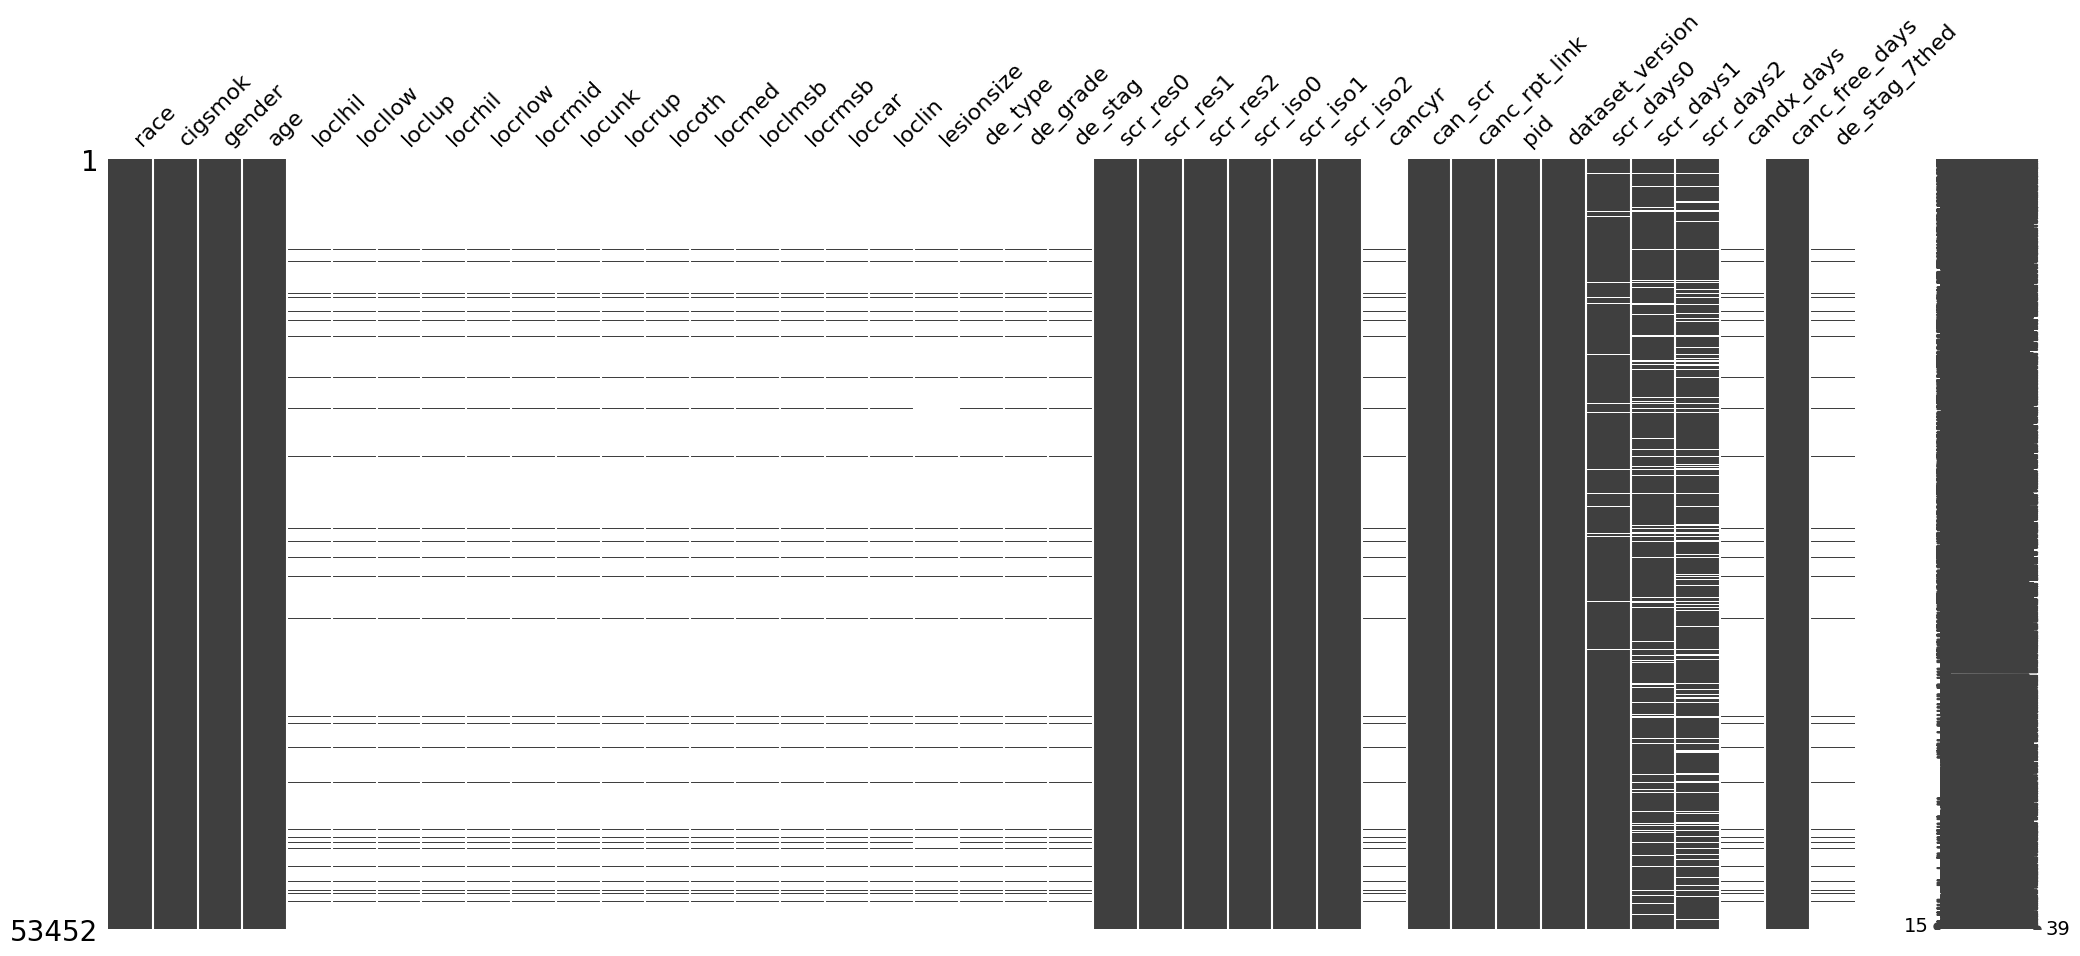

In [11]:
msno.matrix(data)
plt.show()

In [13]:
### Get the columns in the data
columns_list = data.columns.tolist()
print(columns_list)

['race', 'cigsmok', 'gender', 'age', 'loclhil', 'locllow', 'loclup', 'locrhil', 'locrlow', 'locrmid', 'locunk', 'locrup', 'locoth', 'locmed', 'loclmsb', 'locrmsb', 'loccar', 'loclin', 'lesionsize', 'de_type', 'de_grade', 'de_stag', 'scr_res0', 'scr_res1', 'scr_res2', 'scr_iso0', 'scr_iso1', 'scr_iso2', 'cancyr', 'can_scr', 'canc_rpt_link', 'pid', 'dataset_version', 'scr_days0', 'scr_days1', 'scr_days2', 'candx_days', 'canc_free_days', 'de_stag_7thed']


Since this data we are exploring is on the persons, that is the participants data dictionsry, we are interested to know more about the person. There are much of the missing data in the cancer type and the place where the cancer was detected, we are to drop those columns so that we have an understanding of the participant.

In [14]:
columns_to_drop = ['loclhil', 'locllow', 'loclup', 'locrhil', 'locrlow', 'locrmid', 'locunk', 'locrup', 'locoth', 'locmed', 'loclmsb', 'locrmsb', 'loccar', 'loclin','lesionsize', 'de_type', 'de_grade', 'de_stag', 'cancyr', 'candx_days', 'de_stag_7thed' ]

In [15]:
data = data.drop(columns_to_drop, axis=1)

In [16]:
data.head()

,race,cigsmok,gender,age,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,canc_free_days
0,1,1,1,70,4,6,15,4,4,15,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,2353
1,1,1,1,66,2,2,2,2,3,2,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,2391
2,1,1,1,64,2,2,5,2,2,4,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,2381
3,1,0,1,60,4,5,2,4,4,2,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,2688
4,1,0,1,64,4,5,5,4,4,4,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,2435


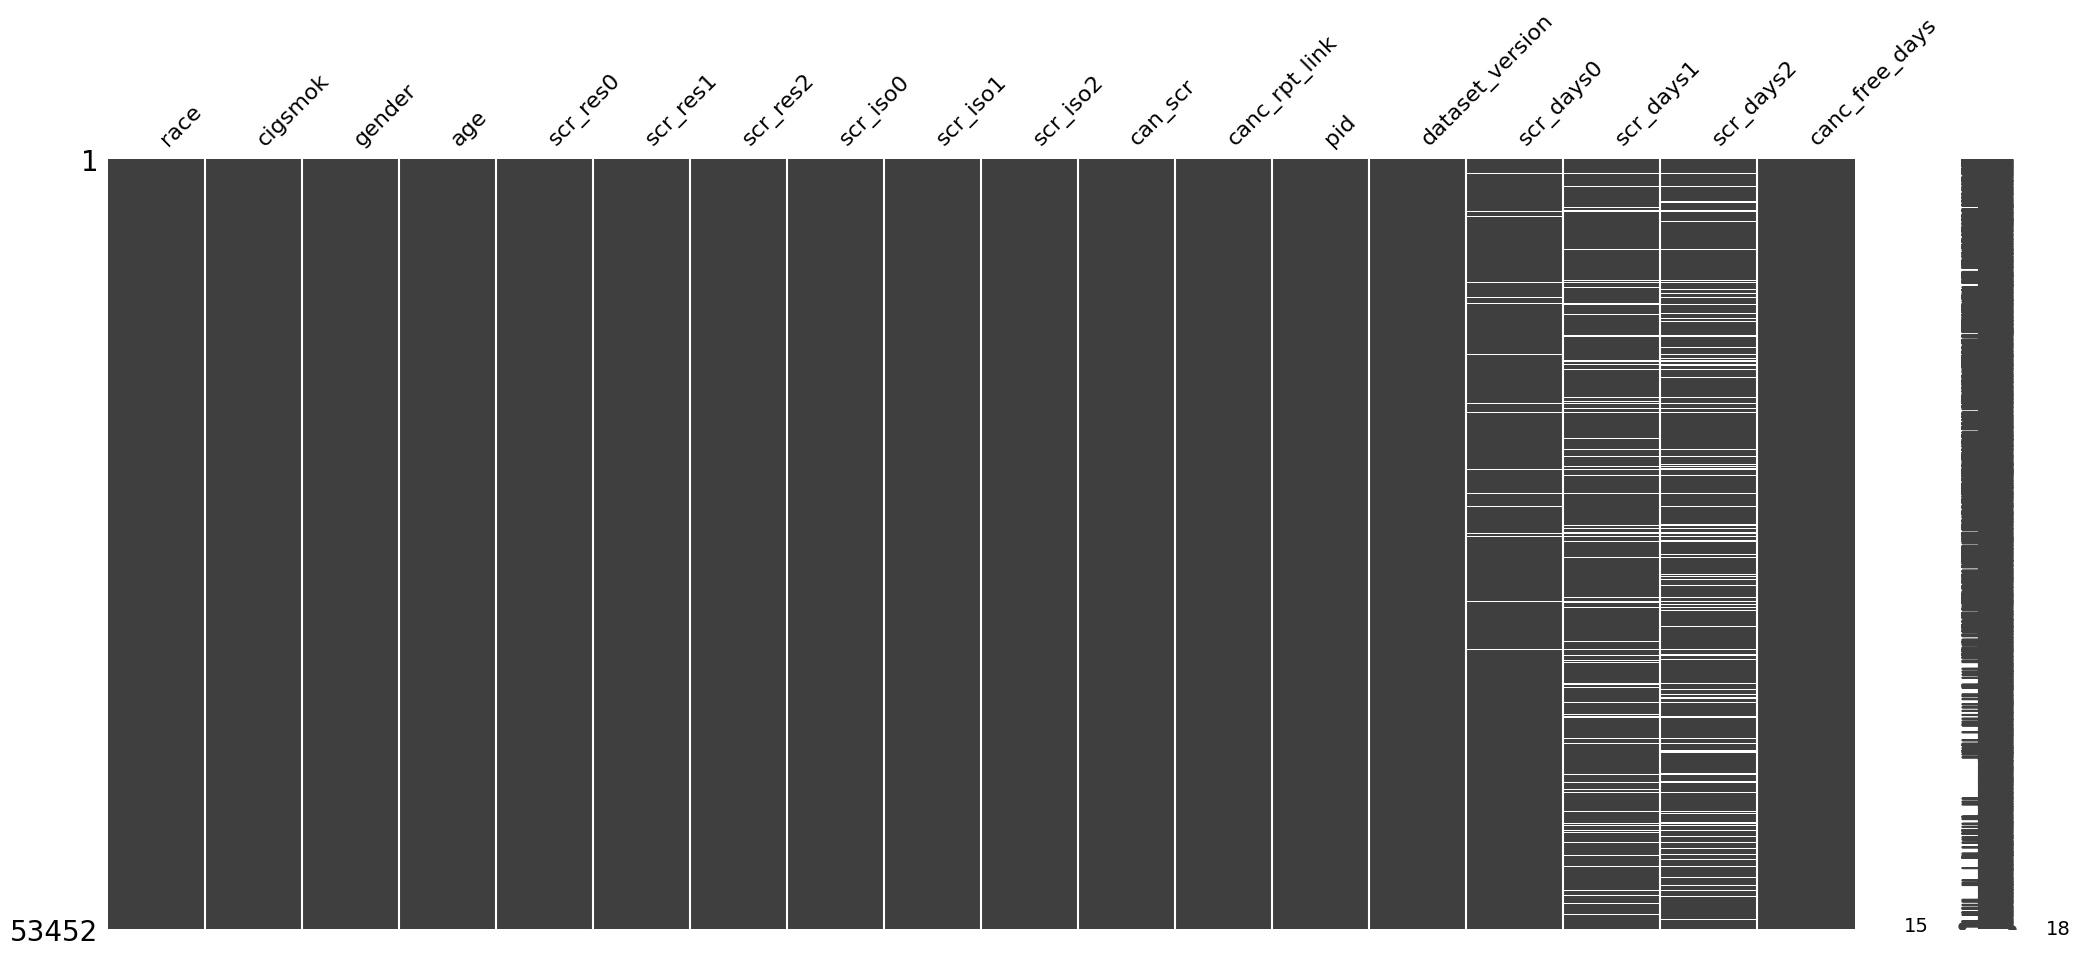

In [17]:
msno.matrix(data)
plt.show()

In [18]:
total_missing_percentage = data.isnull().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(total_missing_percentage)

1.2188505575095412


## Exploratory Data Analysis

#### 1. The structure of our data

In [19]:
data.head()

,race,cigsmok,gender,age,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,can_scr,canc_rpt_link,pid,dataset_version,scr_days0,scr_days1,scr_days2,canc_free_days
0,1,1,1,70,4,6,15,4,4,15,0,0,100001,2011.02.03/05.12.21,0.0,511.0,NaN,2353
1,1,1,1,66,2,2,2,2,3,2,0,0,100002,2011.02.03/05.12.21,13.0,349.0,731.0,2391
2,1,1,1,64,2,2,5,2,2,4,0,0,100003,2011.02.03/05.12.21,12.0,374.0,738.0,2381
3,1,0,1,60,4,5,2,4,4,2,0,0,100004,2011.02.03/05.12.21,8.0,452.0,743.0,2688
4,1,0,1,64,4,5,5,4,4,4,0,0,100005,2011.02.03/05.12.21,56.0,382.0,746.0,2435


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53452 entries, 0 to 53451
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race             53452 non-null  int64  
 1   cigsmok          53452 non-null  int64  
 2   gender           53452 non-null  int64  
 3   age              53452 non-null  int64  
 4   scr_res0         53452 non-null  int64  
 5   scr_res1         53452 non-null  int64  
 6   scr_res2         53452 non-null  int64  
 7   scr_iso0         53452 non-null  int64  
 8   scr_iso1         53452 non-null  int64  
 9   scr_iso2         53452 non-null  int64  
 10  can_scr          53452 non-null  int64  
 11  canc_rpt_link    53452 non-null  int64  
 12  pid              53452 non-null  int64  
 13  dataset_version  53452 non-null  object 
 14  scr_days0        52361 non-null  float64
 15  scr_days1        48812 non-null  float64
 16  scr_days2        47456 non-null  float64
 17  canc_free_da

In [23]:
data.isnull().sum()

race                  0
cigsmok               0
gender                0
age                   0
scr_res0              0
scr_res1              0
scr_res2              0
scr_iso0              0
scr_iso1              0
scr_iso2              0
can_scr               0
canc_rpt_link         0
pid                   0
dataset_version       0
scr_days0          1091
scr_days1          4640
scr_days2          5996
canc_free_days        0
dtype: int64

Most of these patients we have in the data, there is the missing data on the randomized screens. We drop this at this stage as this will not help us get more information of the patient as at now.

In [24]:
columns_to_drop = ['scr_days0','scr_days1', 'scr_days2']

In [25]:
data = data.drop(columns_to_drop, axis=1)

In [26]:
data.head()

,race,cigsmok,gender,age,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,can_scr,canc_rpt_link,pid,dataset_version,canc_free_days
0,1,1,1,70,4,6,15,4,4,15,0,0,100001,2011.02.03/05.12.21,2353
1,1,1,1,66,2,2,2,2,3,2,0,0,100002,2011.02.03/05.12.21,2391
2,1,1,1,64,2,2,5,2,2,4,0,0,100003,2011.02.03/05.12.21,2381
3,1,0,1,60,4,5,2,4,4,2,0,0,100004,2011.02.03/05.12.21,2688
4,1,0,1,64,4,5,5,4,4,4,0,0,100005,2011.02.03/05.12.21,2435


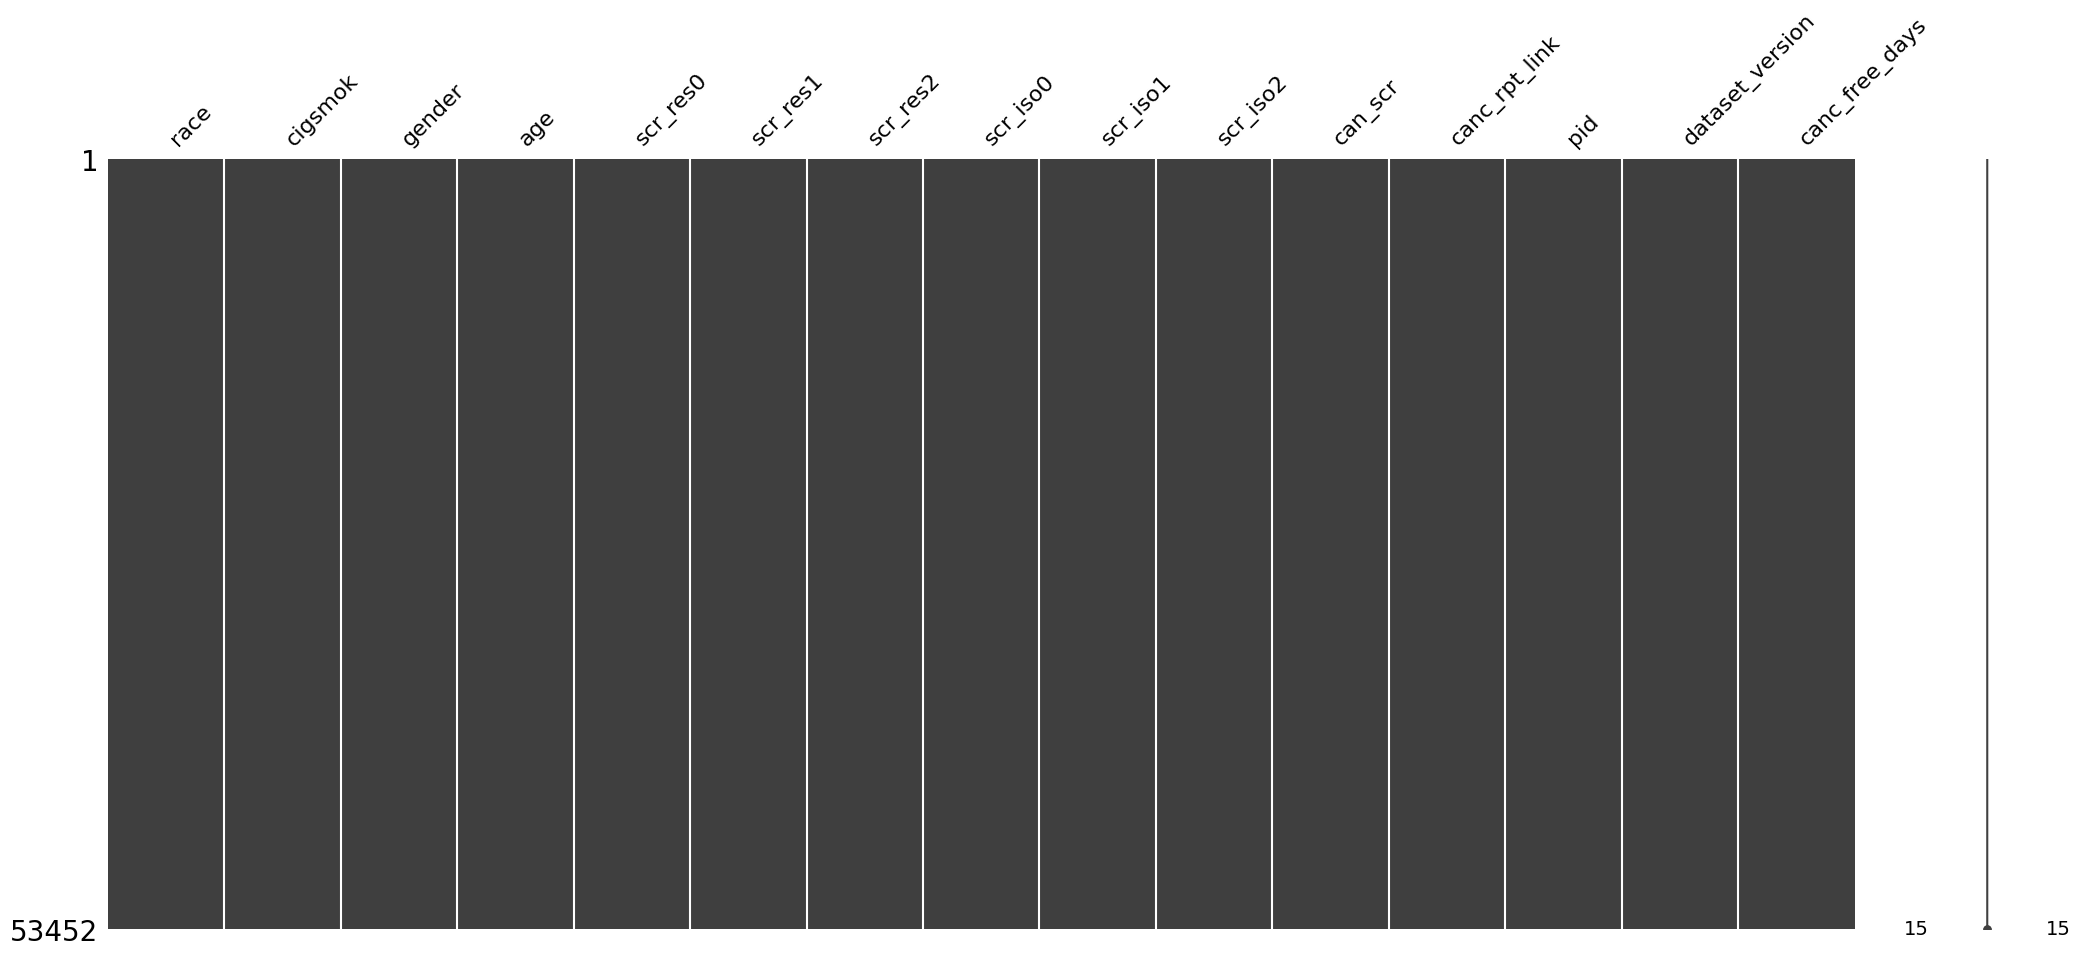

In [27]:
msno.matrix(data)
plt.show()

Now that we have completely dealt with the missing data, we can continue to expplore the dataset

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53452 entries, 0 to 53451
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   race             53452 non-null  int64 
 1   cigsmok          53452 non-null  int64 
 2   gender           53452 non-null  int64 
 3   age              53452 non-null  int64 
 4   scr_res0         53452 non-null  int64 
 5   scr_res1         53452 non-null  int64 
 6   scr_res2         53452 non-null  int64 
 7   scr_iso0         53452 non-null  int64 
 8   scr_iso1         53452 non-null  int64 
 9   scr_iso2         53452 non-null  int64 
 10  can_scr          53452 non-null  int64 
 11  canc_rpt_link    53452 non-null  int64 
 12  pid              53452 non-null  int64 
 13  dataset_version  53452 non-null  object
 14  canc_free_days   53452 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 6.1+ MB


In [29]:
data.isnull().sum()

race               0
cigsmok            0
gender             0
age                0
scr_res0           0
scr_res1           0
scr_res2           0
scr_iso0           0
scr_iso1           0
scr_iso2           0
can_scr            0
canc_rpt_link      0
pid                0
dataset_version    0
canc_free_days     0
dtype: int64

### Data visualizations


In [30]:
data.describe()

,race,cigsmok,gender,age,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,can_scr,canc_rpt_link,pid,canc_free_days
count,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000
mean,1.651500,0.481928,1.410125,61.417926,2.319427,3.374037,3.551822,2.329567,3.200030,3.526603,0.093617,0.018128,149787.261861,2280.369228
std,6.672672,0.499678,0.491861,5.023972,2.434920,4.740823,5.085182,2.436703,4.680572,5.033114,0.543578,0.133417,44861.527538,526.608210
min,1.000000,0.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,100001.000000,0.000000
25%,1.000000,0.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,113368.750000,2251.000000
50%,1.000000,0.000000,1.000000,60.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,126738.500000,2420.000000
75%,1.000000,1.000000,2.000000,65.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,0.000000,0.000000,205492.250000,2549.000000
max,99.000000,1.000000,2.000000,79.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,4.000000,1.000000,218894.000000,2983.000000


In [31]:
import seaborn as sns

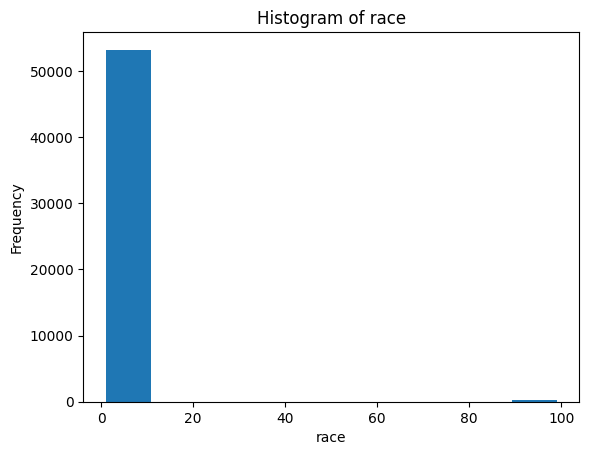

In [33]:
plt.hist(data['race'], bins=10)
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Histogram of race')
plt.show()

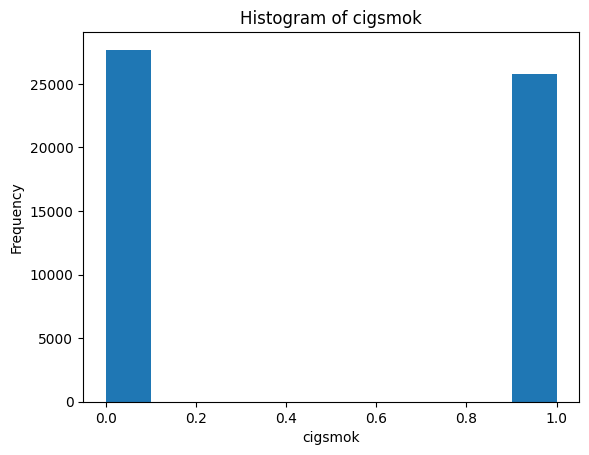

In [34]:
plt.hist(data['cigsmok'], bins=10)
plt.xlabel('cigsmok')
plt.ylabel('Frequency')
plt.title('Histogram of cigsmok')
plt.show()

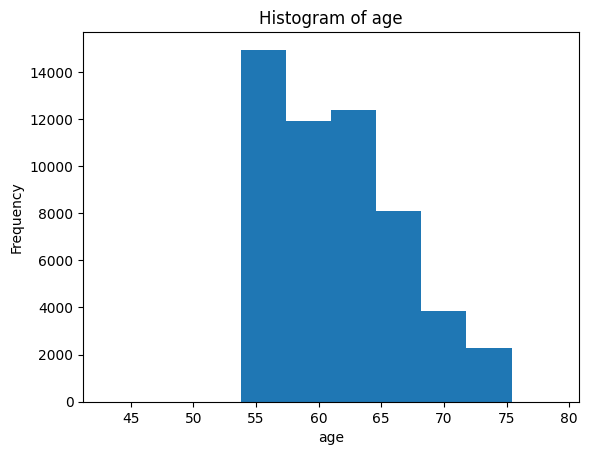

In [35]:
plt.hist(data['age'], bins=10)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

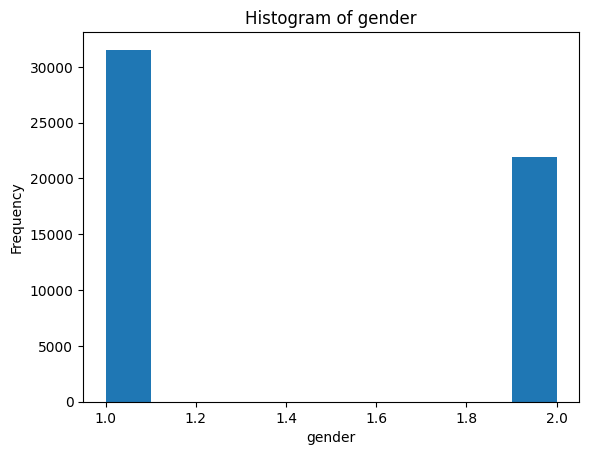

In [36]:
plt.hist(data['gender'], bins=10)
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Histogram of gender')
plt.show()

In [37]:
data.head()

,race,cigsmok,gender,age,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,can_scr,canc_rpt_link,pid,dataset_version,canc_free_days
0,1,1,1,70,4,6,15,4,4,15,0,0,100001,2011.02.03/05.12.21,2353
1,1,1,1,66,2,2,2,2,3,2,0,0,100002,2011.02.03/05.12.21,2391
2,1,1,1,64,2,2,5,2,2,4,0,0,100003,2011.02.03/05.12.21,2381
3,1,0,1,60,4,5,2,4,4,2,0,0,100004,2011.02.03/05.12.21,2688
4,1,0,1,64,4,5,5,4,4,4,0,0,100005,2011.02.03/05.12.21,2435


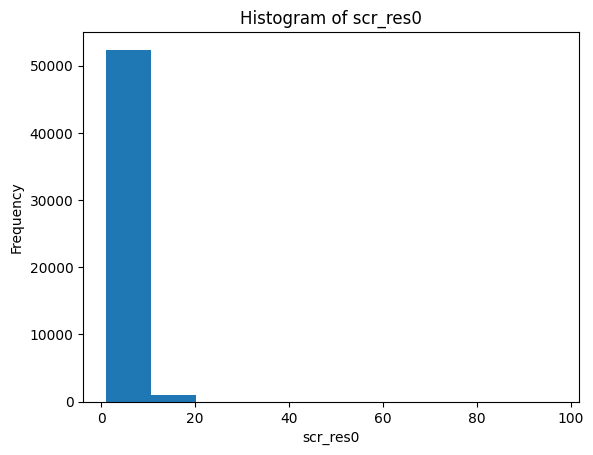

In [38]:
plt.hist(data['scr_res0'], bins=10)
plt.xlabel('scr_res0')
plt.ylabel('Frequency')
plt.title('Histogram of scr_res0')
plt.show()

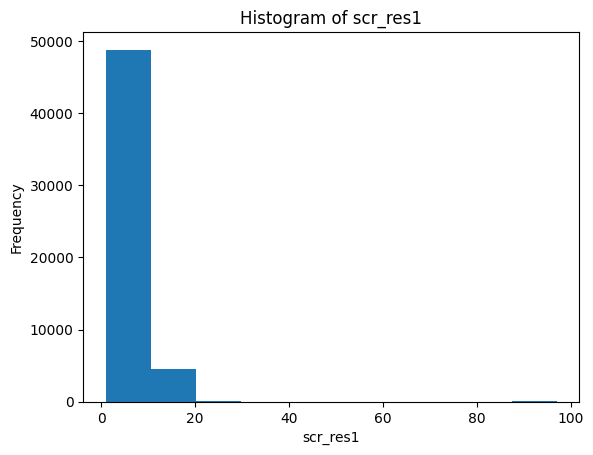

In [39]:
plt.hist(data['scr_res1'], bins=10)
plt.xlabel('scr_res1')
plt.ylabel('Frequency')
plt.title('Histogram of scr_res1')
plt.show()

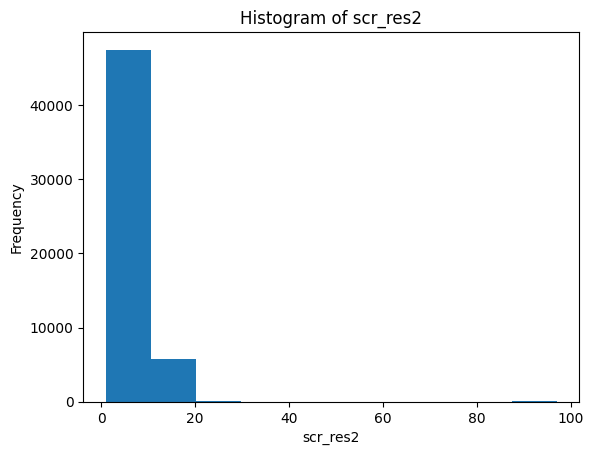

In [40]:
plt.hist(data['scr_res2'], bins=10)
plt.xlabel('scr_res2')
plt.ylabel('Frequency')
plt.title('Histogram of scr_res2')
plt.show()

In [ ]:
sns.boxplot(data=data, x='categorical_variable', y='numerical_variable')
plt.xlabel('Categorical Variable')
plt.ylabel('Numerical Variable')
plt.title('Box Plot of Numerical Variable by Categorical Variable')
plt.show()